### 1. Importing essential Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt

### 2. Reading the Dataset

In [138]:
path = "C:/Users/HP/Desktop/Case Study Data 1.csv"
df = pd.read_csv(path)
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


### 3. Statistics of Dataset

In [139]:
df.describe()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
count,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,9.938000e+03,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9.938000e+03,9938.000000,0.0
mean,1626.947684,157.941751,0.983022,2668.657468,2.892482e+03,1212.684379,1.184803e+03,620.551458,2486.111412,1613.797392,746.308459,98.945128,1.551269e+04,0.828738,NaN
std,7184.209516,2221.445456,97.997007,15436.354622,3.074098e+04,7430.711600,3.078367e+04,3354.461354,14747.601322,6084.118340,3746.600964,1135.016794,8.245152e+04,1.459062,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.830092e+04,1.000000,NaN
max,203217.524000,119687.289600,9769.274400,481472.640000,2.955616e+06,464839.948800,3.032761e+06,67149.830000,932306.112000,145207.771200,62038.236000,44554.456800,7.618235e+06,9.000000,NaN


### 4. Number of Retailers selling each brand

In [140]:
brands_list=[]
for i in range(1,13):
    brands_list.append("Brand"+str(i))

brand_retailer_count = {}
for i in brands_list:
    brand_retailer_count[i] = df[i].loc[df[i]!=0].count()

brand_retailer_count # Representing the No. of Retailers selling each Brand.

{'Brand1': 996,
 'Brand10': 1131,
 'Brand11': 622,
 'Brand12': 134,
 'Brand2': 124,
 'Brand3': 1,
 'Brand4': 702,
 'Brand5': 1459,
 'Brand6': 658,
 'Brand7': 623,
 'Brand8': 685,
 'Brand9': 1101}

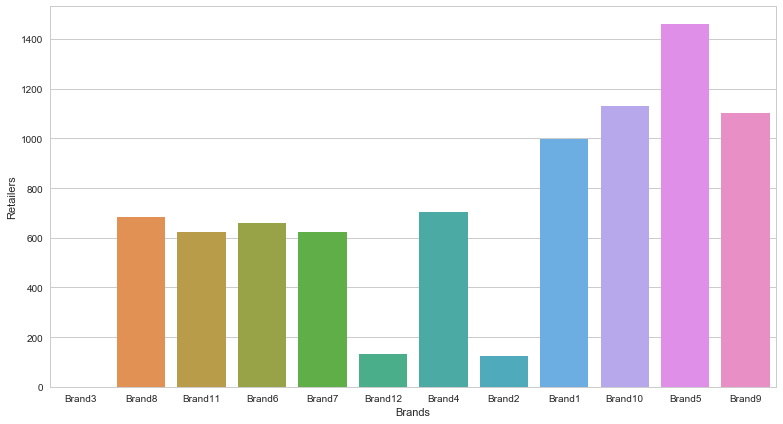

In [159]:
plt.figure(figsize=(13,7))
plt.xlabel("Brands")
plt.ylabel("Retailers")
sns.barplot(x=list(brand_retailer_count.keys()), y=list(brand_retailer_count.values()))

# Brand is not visible because it is only sold by 1 Retailer.

### 5. Determining the Brand Category based on the number of Retailers selling it.

In [141]:
brand_category = {}
for i in brands_list:
    if(brand_retailer_count[i]>=1 and brand_retailer_count[i]<=100):
        brand_category[i] = "VUB" # VUB: Very Unique Brand, when only 1-100 Retailers are selling it.
    elif(brand_retailer_count[i]>100 and brand_retailer_count[i]<=500):
        brand_category[i] = "UB"  # UB: Unique Brand, when 100-500 Retailers are selling it.
    elif(brand_retailer_count[i]>500 and brand_retailer_count[i]<=1000):
        brand_category[i] = "CB"  # CB: Common Brand, when 500-1000 Retailers are selling it.
    else:
        brand_category[i] = "VCB"  # VCB: Very Common Brand, when more than 1000 Retailers are selling it.
    
brand_category

{'Brand1': 'CB',
 'Brand10': 'VCB',
 'Brand11': 'CB',
 'Brand12': 'UB',
 'Brand2': 'UB',
 'Brand3': 'VUB',
 'Brand4': 'CB',
 'Brand5': 'VCB',
 'Brand6': 'CB',
 'Brand7': 'CB',
 'Brand8': 'CB',
 'Brand9': 'VCB'}

#### Inference:

1. VUB: Very Unique Brand, when only 1-100 Retailers are selling it.
2. UB: Unique Brand, when 100-500 Retailers are selling it.
3. CB: Common Brand, when 500-1000 Retailers are selling it.
4. VCB: Very Common Brand, when more than 1000 Retailers are selling it.

### 6. Creating a Categorical Column to categorize the Retailers based on the Type of Brand they are selling.

In [162]:
df.drop(["Category of Retailer"], axis=1, inplace=True)
for i in range(0,len(df)):
    category_list=[]
    for j in brands_list:
        if(df[j][i]!=0 and brand_category[j] not in category_list):
            category_list.append(brand_category[j])
    df.at[i, "Brand_Categories"] = category_list

df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Brand_Categories
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,[VCB]
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,"[CB, VCB]"
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,"[CB, VCB]"
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,[]
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,[]


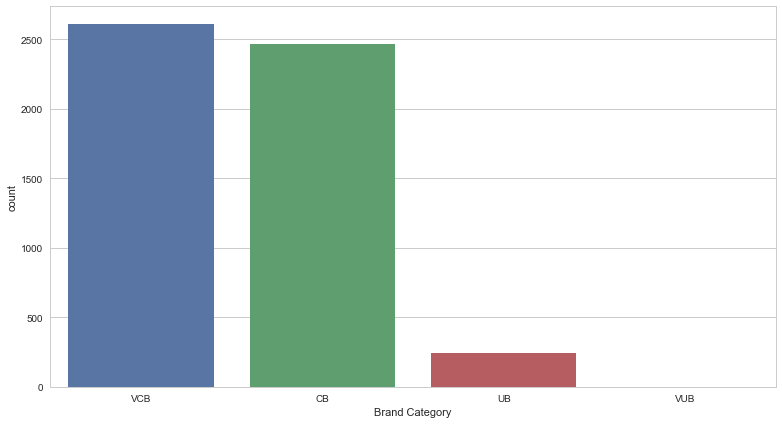

In [169]:
cl = []
for i in range(0,len(df)):
    for j in df["Brand_Categories"][i]:
        cl.append(j)
        

plt.figure(figsize=(13,7))
plt.xlabel("Brand Category")
plt.ylabel("Retailers Count")
sns.countplot(x=cl)

# Very Unique Brand(VUB) is not visible because it is only sold by 1 Retailer as compared to other ones.

#### Inference
1. The Y-axis shows the Number of Retailers selling the Various Categories of Brands shown in X-axis.

### 7. Cleaning the Dataset

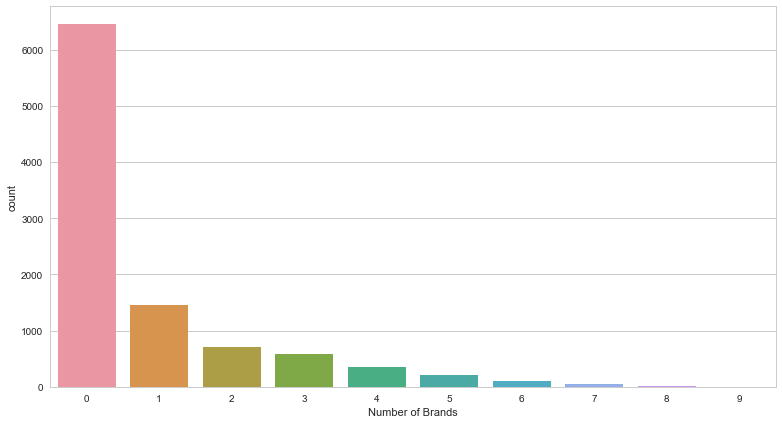

In [171]:
plt.figure(figsize=(13,7))
plt.xlabel("Count of Brands sold by Retailers")
plt.ylabel("Number of Retailers")
sns.countplot(x="Number of Brands", data=df)

# As clearly seen most of the retailers are not selling anything so removing them from the Dataset.

#### Inference
1. Most of the Retailers are not selling any Brand(Represented by the Pink Bar)

### 8. Removing Retailers not selling any brand

In [172]:
new_df = df[df["Number of Brands"]!=0]
new_df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Brand_Categories
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.6100,0.0,0.0,30826.6100,1,[VCB]
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,67713.1692,3,"[CB, VCB]"
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.0000,0.0,0.0,65006.4054,3,"[CB, VCB]"
6,Retailer 7,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,25897.392,0.0000,0.0,0.0,25897.3920,1,[VCB]
9,Retailer 10,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,31309.9064,0.0,0.0,31309.9064,1,[VCB]


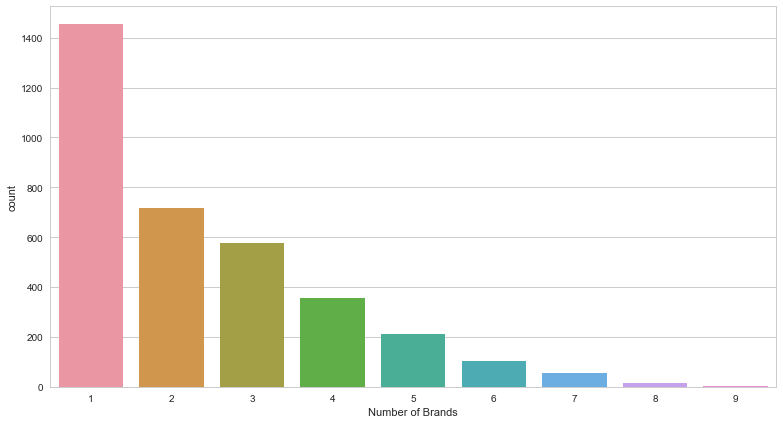

In [173]:
plt.figure(figsize=(13,7))
plt.xlabel("Count of Brands sold by Retailers")
plt.ylabel("Number of Retailers")
sns.countplot(x="Number of Brands", data=new_df)

### 9. Categorical Columns where each cell will represent the Price Range the Retailer if offering on a brand

In [174]:
new_df.describe()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
count,3489.000000,3489.000000,3489.000000,3489.000000,3.489000e+03,3489.000000,3.489000e+03,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3.489000e+03,3489.000000
mean,4634.166261,449.878224,2.800021,7601.352227,8.238889e+03,3454.186688,3.374771e+03,1767.566749,7081.391578,4596.709224,2125.770556,281.833385,4.418604e+04,2.360562
std,11536.918708,3731.954851,165.390981,25324.602271,5.146049e+04,12229.438324,5.188769e+04,5479.881841,24229.408136,9578.161437,6087.442015,1902.258555,1.345373e+05,1.564589
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.632464e+02,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.545434e+04,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.101304e+04,2.000000
75%,4916.553000,0.000000,0.000000,0.000000,1.303938e+04,0.000000,0.000000e+00,0.000000,12948.696000,5931.779400,0.000000,0.000000,5.630606e+04,3.000000
max,203217.524000,119687.289600,9769.274400,481472.640000,2.955616e+06,464839.948800,3.032761e+06,67149.830000,932306.112000,145207.771200,62038.236000,44554.456800,7.618235e+06,9.000000


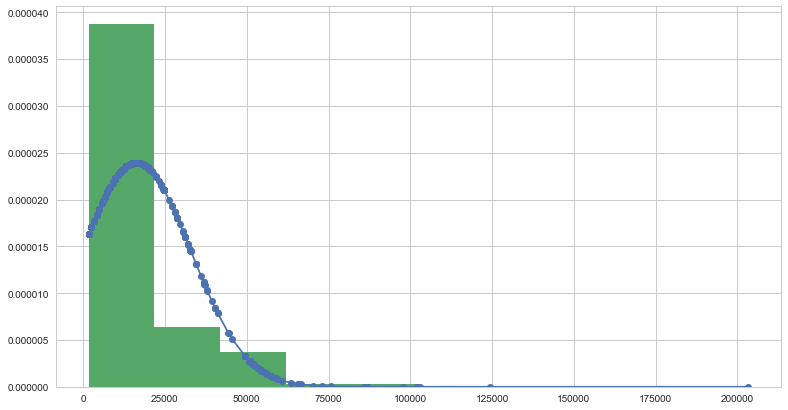

In [177]:
brand_1 = np.array(new_df[new_df["Brand1"]!=0]["Brand1"])
brand_1 = sorted(brand_1)
fit = stats.norm.pdf(brand_1, np.mean(brand_1), np.std(brand_1))
plt.figure(figsize=(13,7))
pl.plot(brand_1,fit,'-o')
pl.hist(brand_1,density=True)
pl.show()

# This Graph shows the Price Distribution of the Brand_1 by various Retailers.
# As clearly seen Many Retailers are Selling the Same Brand on various Prices.
# So Categorizing the Retailers based on the Price they are selling the Product

#### Inference
1. This Graph shows the Price Distribution of the Brand_1 by various Retailers.
2. As clearly seen Many Retailers are Selling the Same Brand on various Prices.
3. So Categorizing the Retailers based on the Price they are selling the Product.

In [179]:
print("Mean of Brand_1 Price: ",new_df[new_df["Brand1"]!=0]["Brand1"].mean())
print("Standard Deviation of Brand_1 Price: ",new_df[new_df["Brand1"]!=0]["Brand1"].std())

Mean of Brand_1 Price:  16233.540246184763
Standard Deviation of Brand_1 Price:  16676.309791925967


In [182]:
mean_list = {}
std_list = {}
for i in brands_list:
    mean_list[i] = np.mean(sorted(np.array(new_df[new_df[i]!=0][i])))
    std_list[i] = np.std(sorted(np.array(new_df[new_df[i]!=0][i])))

print("Mean Price of Each Brand: ", mean_list)
print("Standard Deviation of Each Brand: ", std_list)

Mean Price of Each Brand:  {'Brand3': 9769.2744, 'Brand8': 9002.978667445255, 'Brand11': 11924.137409003215, 'Brand6': 18315.588683282673, 'Brand7': 18899.79857142857, 'Brand12': 7338.184173134329, 'Brand4': 37779.370256410264, 'Brand2': 12658.267122580644, 'Brand1': 16233.540246184739, 'Brand10': 14180.299277807251, 'Brand5': 19702.180947224122, 'Brand9': 22440.486116621254}
Standard Deviation of Each Brand:  {'Brand3': 0.0, 'Brand8': 9368.407907535178, 'Brand11': 9537.70511496901, 'Brand6': 22816.761537155046, 'Brand7': 121573.78737776885, 'Brand12': 6512.333968673614, 'Brand4': 45237.94924068466, 'Brand2': 15402.262285032351, 'Brand1': 16667.93604809295, 'Brand10': 12125.645913139057, 'Brand5': 78135.13730834184, 'Brand9': 38925.19697482593}


In [185]:
for i, row in new_df.iterrows():
    for j in brands_list:
        if(new_df[j][i]==0):
            new_df.at[i, (str(j)+"_Price_Category")] = "_"
        elif(new_df[j][i]<=(mean_list[j]-2*std_list[j])):
            new_df.at[i, (str(j)+"_Price_Category")] = " VERY_LOW"
        elif(new_df[j][i]>(mean_list[j]-2*std_list[j]) and new_df[j][i]<=(mean_list[j]-std_list[j])):
            new_df.at[i, (str(j)+"_Price_Category")] = "LOW"
        elif(new_df[j][i]>(mean_list[j]-std_list[j]) and new_df[j][i]<=(mean_list[j]+std_list[j])):
            new_df.at[i, (str(j)+"_Price_Category")] = "MEDIUM"
        elif(new_df[j][i]>(mean_list[j]+std_list[j]) and new_df[j][i]<=(mean_list[j]+2*std_list[j])):
            new_df.at[i, (str(j)+"_Price_Category")] = "HIGH"
        else:
            new_df.at[i, (str(j)+"_Price_Category")] = "VERY_HIGH"
    
# For Each Retailer there's a column where it representing that at what price category the Retailer is selling a Brand.
# There are 5 Categories: VERY_LOW, LOW, MEDIUM, HIGH ,VERY_HIGH.
# Each category is made based on the Statistical Inferences made earlier.
# VERY_LOW: [0-mean-2*std] | LOW: [mean-2*std - mean-std] | MEDIUM: [mean-std - mean+std] | HIGH: [mean+std - mean+2*std] | VERY_HIGH: [mean+2*std - *]


#### Inference
1. For Each Retailer there's a column where it representing that at what price category the Retailer is selling a Brand.
2. There are 5 Categories: VERY_LOW, LOW, MEDIUM, HIGH ,VERY_HIGH.
3. Each category is made based on the Statistical Inferences made earlier.
4. VERY_LOW: [0-mean-2*std]
5. LOW: [mean-2*std - mean-std]
6. MEDIUM: [mean-std - mean+std]
7. HIGH: [mean+std - mean+2*std]
8. VERY_HIGH: [mean+2*std - *]

In [186]:
new_df.head(10)

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,...,Brand3_Price_Category,Brand4_Price_Category,Brand5_Price_Category,Brand6_Price_Category,Brand7_Price_Category,Brand8_Price_Category,Brand9_Price_Category,Brand10_Price_Category,Brand11_Price_Category,Brand12_Price_Category
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.000,...,_,_,_,_,_,_,_,HIGH,_,_
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.000,0.000,...,_,MEDIUM,MEDIUM,_,_,_,_,_,_,_
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.000,12948.696,...,_,_,MEDIUM,_,_,_,MEDIUM,_,_,_
6,Retailer 7,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,25897.392,...,_,_,_,_,_,_,MEDIUM,_,_,_
9,Retailer 10,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.000,0.000,...,_,_,_,_,_,_,_,HIGH,_,_
12,Retailer 13,3277.7020,0.0,0.0,0.000,12556.5876,0.0,0.0,0.000,12948.696,...,_,_,MEDIUM,_,_,_,MEDIUM,_,_,_
13,Retailer 14,12345.3354,0.0,0.0,0.000,5151.1088,0.0,0.0,6714.983,12948.696,...,_,_,MEDIUM,_,_,MEDIUM,MEDIUM,HIGH,MEDIUM,_
15,Retailer 16,0.0000,0.0,0.0,120368.160,0.0000,0.0,0.0,0.000,0.000,...,_,HIGH,_,_,_,_,_,_,_,_
16,Retailer 17,0.0000,0.0,0.0,24073.632,0.0000,0.0,0.0,0.000,0.000,...,_,MEDIUM,_,_,_,_,_,_,_,_
17,Retailer 18,0.0000,0.0,0.0,0.000,10624.9218,0.0,0.0,0.000,0.000,...,_,_,MEDIUM,_,_,_,_,MEDIUM,MEDIUM,_


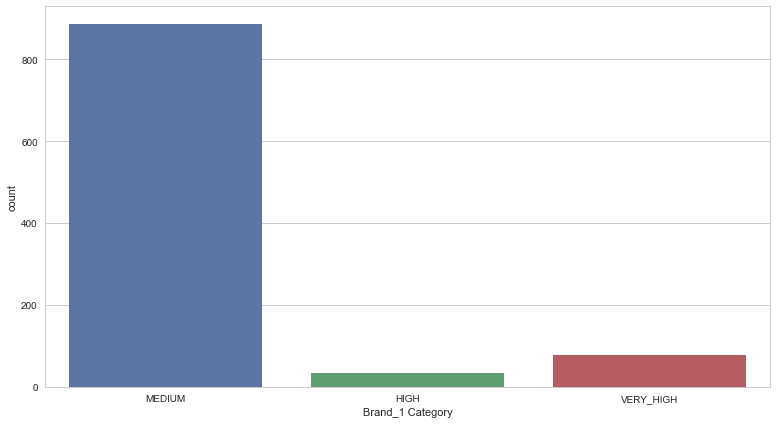

In [202]:
arr = np.array(new_df["Brand1_Price_Category"])
new_arr = list(filter(lambda x : x != '_', arr))

plt.figure(figsize=(13,7))
plt.xlabel("Brand_1 Category")
plt.ylabel("Count")
sns.countplot(x=new_arr)

# This Graph shows the Brand_1 Price Category and the Number of Retailers selling it at each category.
# Therefore it can be seen that most of retailers are selling the Brand_1 at Medium Price.
# This can be used to classify the retailers based on the Price Category they are selling the Brand.

#### Inference
1. This Graph shows the Brand_1 Price Category and the Number of Retailers selling it at each category.
2. Therefore it can be seen that most of retailers are selling the Brand_1 at Medium Price.
3. This can be used to classify the retailers based on the Price Category they are selling the Brand.

## Made by Rohan Goel
 15th Feb 2020

In [203]:
new_df.to_csv("Rohan_Goel_Marytics_Internship.csv")